In [1]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import datetime as dt

In [2]:
# Read CSV data

path = "Observations/observations-138232.csv"
monarch_data = pd.read_csv(path)
monarch_data.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,created_at,updated_at,quality_grade,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,91592,Fri Jun 15 2012 15:36:04 GMT-0500 (CDT),2012-06-15,2012-06-15 20:36:04 UTC,Central Time (US & Canada),477,loarie,2012-06-15 20:37:36 UTC,2019-12-16 06:29:16 UTC,research,...,NaN,NaN,False,NaN,NaN,Monarch,Danaus plexippus,Monarch,Insecta,48662
1,409489,2013-09-07 12:49:47,2013-09-07,2013-09-07 17:49:47 UTC,Central Time (US & Canada),22981,maczi001,2013-09-26 17:30:22 UTC,2019-12-16 06:29:18 UTC,research,...,NaN,NaN,False,NaN,NaN,Monarch,Danaus plexippus,Monarch,Insecta,48662
2,848169,Mon Aug 25 2014 16:24:58 GMT-0500 (CDT),2014-08-25,2014-08-25 21:24:58 UTC,Central Time (US & Canada),50122,amannelin,2014-08-25 21:48:17 UTC,2019-11-18 20:43:48 UTC,research,...,NaN,NaN,False,NaN,NaN,Monarch Butterfly,Danaus plexippus,Monarch,Insecta,48662
3,855080,Sat Aug 30 2014 14:40:09 GMT-0500 (CDT),2014-08-30,2014-08-30 19:40:09 UTC,Central Time (US & Canada),28037,metsa,2014-08-31 06:39:46 UTC,2019-11-18 20:44:17 UTC,research,...,NaN,NaN,False,NaN,NaN,Monarch,Danaus plexippus,Monarch,Insecta,48662
4,900234,2014-09-07,2014-09-07,NaN,Eastern Time (US & Canada),39038,gcasp60,2014-09-29 01:07:19 UTC,2019-11-18 17:54:43 UTC,research,...,NaN,NaN,False,NaN,NaN,Monarch Butterfly,Danaus plexippus,Monarch,Insecta,48662


In [3]:
# List columns
list(monarch_data.columns)

['id',
 'observed_on_string',
 'observed_on',
 'time_observed_at',
 'time_zone',
 'user_id',
 'user_login',
 'created_at',
 'updated_at',
 'quality_grade',
 'license',
 'url',
 'image_url',
 'tag_list',
 'description',
 'num_identification_agreements',
 'num_identification_disagreements',
 'captive_cultivated',
 'oauth_application_id',
 'place_guess',
 'latitude',
 'longitude',
 'positional_accuracy',
 'public_positional_accuracy',
 'geoprivacy',
 'taxon_geoprivacy',
 'coordinates_obscured',
 'positioning_method',
 'positioning_device',
 'species_guess',
 'scientific_name',
 'common_name',
 'iconic_taxon_name',
 'taxon_id']

In [4]:
# Begin cleaning the data, keeping only what we need

monarch_data_cleaned = monarch_data.drop(columns=['observed_on_string', 'time_observed_at', 'user_id', 
                                                  'user_login', 'quality_grade', 'license', 'url', 'image_url',
                                                  'tag_list', 'description', 'num_identification_agreements',
                                                  'num_identification_disagreements', 'oauth_application_id',
                                                  'positional_accuracy','public_positional_accuracy', 'geoprivacy',
                                                  'taxon_geoprivacy', 'coordinates_obscured', 'positioning_method',
                                                  'positioning_device', 'species_guess', 'iconic_taxon_name', 'taxon_id'])
monarch_data_cleaned.head()

,id,observed_on,time_zone,created_at,updated_at,captive_cultivated,place_guess,latitude,longitude,scientific_name,common_name
0,91592,2012-06-15,Central Time (US & Canada),2012-06-15 20:37:36 UTC,2019-12-16 06:29:16 UTC,False,"Cannon River, Northfield, Minnesota, US",44.474248,-93.142258,Danaus plexippus,Monarch
1,409489,2013-09-07,Central Time (US & Canada),2013-09-26 17:30:22 UTC,2019-12-16 06:29:18 UTC,False,"Hennepin County, US-MN, US",44.900633,-93.246460,Danaus plexippus,Monarch
2,848169,2014-08-25,Central Time (US & Canada),2014-08-25 21:48:17 UTC,2019-11-18 20:43:48 UTC,False,"2145–2217 Carter Ave, St Paul, MN, US",44.981670,-93.191742,Danaus plexippus,Monarch
3,855080,2014-08-30,Central Time (US & Canada),2014-08-31 06:39:46 UTC,2019-11-18 20:44:17 UTC,False,"Phalen Park, MN",44.992599,-93.059843,Danaus plexippus,Monarch
4,900234,2014-09-07,Eastern Time (US & Canada),2014-09-29 01:07:19 UTC,2019-11-18 17:54:43 UTC,False,"Carver Park Reserve, Carver County, MN",44.881957,-93.682592,Danaus plexippus,Monarch


In [5]:
# Sort by observation date

monarch_data_cleaned.sort_values(by="observed_on", inplace=True, ignore_index=True)
monarch_data_cleaned.head(10)

,id,observed_on,time_zone,created_at,updated_at,captive_cultivated,place_guess,latitude,longitude,scientific_name,common_name
0,8582406,2005-08-04,Central Time (US & Canada),2017-10-28 01:07:16 UTC,2017-10-30 22:55:35 UTC,False,"Roseville, MN 55113, USA",45.002818,-93.122859,Danaus plexippus,Monarch
1,8582794,2005-09-06,Central Time (US & Canada),2017-10-28 01:42:43 UTC,2017-10-28 01:47:16 UTC,False,"Roseville, MN 55113, USA",45.002484,-93.121957,Danaus plexippus,Monarch
2,16135486,2009-07-12,Mountain Time (US & Canada),2018-09-02 16:24:23 UTC,2019-11-18 22:14:09 UTC,False,"Apple Valley, MN 55124, USA",44.769167,-93.192833,Danaus plexippus,Monarch
3,49982494,2009-09-26,UTC,2020-06-17 20:51:42 UTC,2020-06-17 21:03:48 UTC,False,"Hastings, MN 55033, USA",44.766189,-92.814564,Danaus plexippus,Monarch
4,69634867,2010-10-14,UTC,2021-02-15 20:45:00 UTC,2021-02-15 20:45:54 UTC,False,"46th St N & Gershwin Ave N, Oakdale, MN 55128,...",45.014872,-92.982326,Danaus plexippus,Monarch
5,1231230,2011-05-30,Central Time (US & Canada),2015-02-13 04:20:26 UTC,2019-11-18 17:37:43 UTC,False,"Minnesota, United States",44.526119,-93.006039,Danaus plexippus,Monarch
6,67933090,2011-08-04,UTC,2021-01-12 00:52:28 UTC,2021-01-13 03:51:38 UTC,False,"Oakdale, MN 55128, USA",45.015458,-92.984599,Danaus plexippus,Monarch
7,51840221,2011-08-09,UTC,2020-07-03 21:37:28 UTC,2020-07-03 22:07:11 UTC,False,"Maplewood, MN, USA",44.967607,-92.989568,Danaus plexippus,Monarch
8,69774424,2011-08-13,Pacific Time (US & Canada),2021-02-18 18:02:08 UTC,2021-02-20 00:29:53 UTC,False,"South Loop District, Bloomington, MN, USA",44.848308,-93.235409,Danaus plexippus,Monarch
9,27957023,2011-08-23,UTC,2019-06-30 21:08:00 UTC,2019-07-01 21:50:16 UTC,False,"Chanhassen, MN, USA",44.856926,-93.598765,Danaus plexippus,Monarch


In [6]:
# Break down dates into components

monarch_data_cleaned["observed_on"] = pd.to_datetime(monarch_data_cleaned["observed_on"])

monarch_data_cleaned["year"] = monarch_data_cleaned["observed_on"].dt.year
monarch_data_cleaned["month"] = monarch_data_cleaned["observed_on"].dt.month
monarch_data_cleaned["day"] = monarch_data_cleaned["observed_on"].dt.day

monarch_data_cleaned.head()

,id,observed_on,time_zone,created_at,updated_at,captive_cultivated,place_guess,latitude,longitude,scientific_name,common_name,year,month,day
0,8582406,2005-08-04,Central Time (US & Canada),2017-10-28 01:07:16 UTC,2017-10-30 22:55:35 UTC,False,"Roseville, MN 55113, USA",45.002818,-93.122859,Danaus plexippus,Monarch,2005,8,4
1,8582794,2005-09-06,Central Time (US & Canada),2017-10-28 01:42:43 UTC,2017-10-28 01:47:16 UTC,False,"Roseville, MN 55113, USA",45.002484,-93.121957,Danaus plexippus,Monarch,2005,9,6
2,16135486,2009-07-12,Mountain Time (US & Canada),2018-09-02 16:24:23 UTC,2019-11-18 22:14:09 UTC,False,"Apple Valley, MN 55124, USA",44.769167,-93.192833,Danaus plexippus,Monarch,2009,7,12
3,49982494,2009-09-26,UTC,2020-06-17 20:51:42 UTC,2020-06-17 21:03:48 UTC,False,"Hastings, MN 55033, USA",44.766189,-92.814564,Danaus plexippus,Monarch,2009,9,26
4,69634867,2010-10-14,UTC,2021-02-15 20:45:00 UTC,2021-02-15 20:45:54 UTC,False,"46th St N & Gershwin Ave N, Oakdale, MN 55128,...",45.014872,-92.982326,Danaus plexippus,Monarch,2010,10,14


In [7]:
# Group observations by year

monarch_grouped = monarch_data_cleaned.groupby(monarch_data_cleaned["year"]).count()
monarch_grouped

,id,observed_on,time_zone,created_at,updated_at,captive_cultivated,place_guess,latitude,longitude,scientific_name,common_name,year,month,day
year,,,,,,,,,,,,,,
2005,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2009,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2010,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2011,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2012,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2013,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2014,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2015,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2016,28,28,28,28,28,28,28,28,28,28,28,28,28,28


Fun facts about iNaturalist: it began as a research project in 2008, but really took off in 2017 with the addition of Seek, iNaturalist's machine-learning AI mobile identification tool. The annual counts here reflect this, as well as the growing awareness of the public of the availability of the tool and the power of citizen-scientists in helping collect and model data. 

Unfortunately, this is not enough data on its own to determine truly meaningful trends. But we still might be able to learn interesting things from what we have here. Or not. We'll see.

In [8]:
# Plot monthly observations for the years 2016 through 2020

monarch_by_month = monarch_data_cleaned[["id", "year", "month"]].copy()
monarch_by_month

,id,year,month
0,8582406,2005,8
1,8582794,2005,9
2,16135486,2009,7
3,49982494,2009,9
4,69634867,2010,10
...,...,...,...
1254,61776199,2020,10
1255,61960247,2020,10
1256,66295922,2020,10
1257,62263572,2020,10


In [10]:
# 2016

monarch_2016 = monarch_by_month.loc[monarch_by_month.year == 2016]
monarch_2016 = monarch_2016.groupby(monarch_2016["month"]).count()
monarch_2016 = monarch_2016.drop(columns="id")
monarch_2016.rename(columns = {"year" : "2016"}, inplace=True)
monarch_2016

,2016
month,
5,1
6,1
7,8
8,12
9,6


In [11]:
# 2017

monarch_2017 = monarch_by_month.loc[monarch_by_month.year == 2017]
monarch_2017 = monarch_2017.groupby(monarch_2017["month"]).count()
monarch_2017 = monarch_2017.drop(columns="id")
monarch_2017.rename(columns = {"year" : "2017"}, inplace=True)
monarch_2017

,2017
month,
5,1
6,9
7,26
8,28
9,18
10,4


In [12]:
# 2018

monarch_2018 = monarch_by_month.loc[monarch_by_month.year == 2018]
monarch_2018 = monarch_2018.groupby(monarch_2018["month"]).count()
monarch_2018 = monarch_2018.drop(columns="id")
monarch_2018.rename(columns = {"year": "2018"}, inplace=True)
monarch_2018

,2018
month,
5,6
6,50
7,88
8,76
9,52
10,1


In [13]:
# 2019

monarch_2019 = monarch_by_month.loc[monarch_by_month.year == 2019]
monarch_2019 = monarch_2019.groupby(monarch_2019["month"]).count()
monarch_2019 = monarch_2019.drop(columns="id")
monarch_2019.rename(columns = {"year" : "2019"}, inplace=True)
monarch_2019

,2019
month,
5,5
6,93
7,120
8,99
9,52
10,11


In [14]:
# 2020

monarch_2020 = monarch_by_month.loc[monarch_by_month.year == 2020]
monarch_2020 = monarch_2020.groupby(monarch_2020["month"]).count()
monarch_2020 = monarch_2020.drop(columns = "id")
monarch_2020.rename(columns = {"year": "2020"}, inplace=True)
monarch_2020

,2020
month,
4,1
5,5
6,86
7,178
8,130
9,42
10,7


In [21]:
monarch_combined = pd.concat([monarch_2016, monarch_2017, monarch_2018, monarch_2019, monarch_2020], axis = 1)
monarch_combined.fillna(0, inplace=True)
monarch_combined

,2016,2017,2018,2019,2020
month,,,,,
4,0.0,0.0,0.0,0.0,1
5,1.0,1.0,6.0,5.0,5
6,1.0,9.0,50.0,93.0,86
7,8.0,26.0,88.0,120.0,178
8,12.0,28.0,76.0,99.0,130
9,6.0,18.0,52.0,52.0,42
10,0.0,4.0,1.0,11.0,7


In [23]:
months_list = ["April", "May", "June", "July", "August", "September", "October"]

monarch_combined.index = months_list
monarch_combined

,2016,2017,2018,2019,2020
April,0.0,0.0,0.0,0.0,1
May,1.0,1.0,6.0,5.0,5
June,1.0,9.0,50.0,93.0,86
July,8.0,26.0,88.0,120.0,178
August,12.0,28.0,76.0,99.0,130
September,6.0,18.0,52.0,52.0,42
October,0.0,4.0,1.0,11.0,7


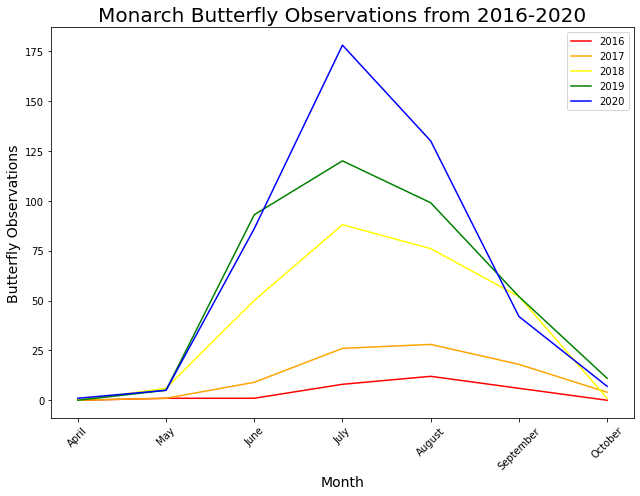

In [25]:
# Draw line plot of years studied

colors = ["red","orange","yellow","green","blue"]

monarch_combined.plot.line(color=colors, figsize=(9,7))
plt.legend(loc = "upper right")

# Labeling 
plt.title("Monarch Butterfly Observations from 2016-2020", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Butterfly Observations", fontsize=14)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.savefig("Images/Butterfly-Obs.png")

plt.show()